In [22]:
# %% importa i moduli
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import tensorflow as tf

In [23]:
# %% download e caricamento del file .npz contenente il dataset
!wget https://politecnicobari-my.sharepoint.com/:u:/g/personal/marco_scarpetta_poliba_it/EWPUBcglPk9Iigof03DZ86gB2Lx8KK8bFCSEbYSXE4KyCQ?download=1 -O /content/lines.npz
data = np.load('/content/lines.npz')

# lunghezza del lato delle immagini in pixel
img_size = 64

--2021-01-19 09:24:48--  https://politecnicobari-my.sharepoint.com/:u:/g/personal/marco_scarpetta_poliba_it/EWPUBcglPk9Iigof03DZ86gB2Lx8KK8bFCSEbYSXE4KyCQ?download=1
Resolving politecnicobari-my.sharepoint.com (politecnicobari-my.sharepoint.com)... 13.107.136.9
Connecting to politecnicobari-my.sharepoint.com (politecnicobari-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/marco_scarpetta_poliba_it/Documents/data/esempi/lines.npz?originalPath=aHR0cHM6Ly9wb2xpdGVjbmljb2JhcmktbXkuc2hhcmVwb2ludC5jb20vOnU6L2cvcGVyc29uYWwvbWFyY29fc2NhcnBldHRhX3BvbGliYV9pdC9FV1BVQmNnbFBrOUlpZ29mMDNEWjg2Z0IyTHg4S0s4YkZDU0ViWVNYRTRLeUNRP3J0aW1lPXlOUHlFVnk4MkVn [following]
--2021-01-19 09:24:49--  https://politecnicobari-my.sharepoint.com/personal/marco_scarpetta_poliba_it/Documents/data/esempi/lines.npz?originalPath=aHR0cHM6Ly9wb2xpdGVjbmljb2JhcmktbXkuc2hhcmVwb2ludC5jb20vOnU6L2cvcGVyc29uYWwvbWFyY29fc2NhcnBldHRhX3BvbGliYV9pdC9FV1BVQmNnbFBrO

In [24]:
# %% lista degli array contenuti nel file del dataset
list(data.keys())

['training_images',
 'training_labels',
 'validation_images',
 'validation_labels']

In [25]:
# %% dimensioni dell'array contenente le immagini di training
data['training_images'].shape

(50000, 64, 64)

In [26]:
# %% dimensioni del vettore dei label di training
# questo array contiene le lunghezze delle linee presenti in ogni immagine del
# training set 
data['training_labels'].shape

(50000,)

In [30]:
# %% preparazione del dataset
## caricamento delle lunghezze delle linee in pixel
training_labels_px = data['training_labels']
validation_labels_px = data['validation_labels']

# unione dei label di training e validazione in un unico array
labels_px = np.hstack([training_labels_px, validation_labels_px])

# calcolo dei valori minimi e massimi delle lunghezze
labels_px_min = np.min(labels_px)
labels_px_max = np.max(labels_px)
labels_px_range = labels_px_max - labels_px_min

# label normalizzati nell'intervallo [0, 1]
training_labels = training_labels_px / labels_px_range
validation_labels = validation_labels_px / labels_px_range

print(np.max(training_labels))
print(np.max(training_labels_px/labels_px_range))


## caricamento degli array contenenti le immagini in nuove variabili
training_images = data['training_images']
validation_images = data['validation_images']

1.1719097743930944
1.1719097743930944


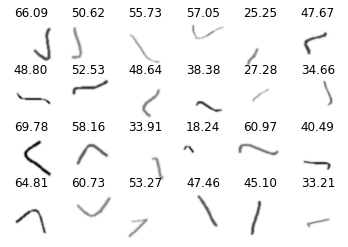

In [31]:
# %% visualizzazione di alcuni esempi presenti nel dataset di training
rows = 4
cols = 6

# primo campione da mostrare
start = 1000

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    img = training_images[start + i]
    plt.imshow(img, cmap='Greys', vmin=0, vmax=1)
    plt.axis('off')
    plt.title('{:.2f}'.format(training_labels_px[start + i]))
plt.show()

In [36]:
# %% costruzione della rete neurale per la misura della lunghezza della linea
# presente in ogni immagine

inputs = tf.keras.Input(shape = (img_size, img_size))

# aggiunge un asse al tensore di ingresso, perché richiesto del layer Conv2D
x = tf.keras.layers.Reshape([img_size, img_size, 1])(inputs)

# sequenza di layer convoluzionali con attivazione 'relu'
# (classe tf.keras.layers.Conv2D) seguiti da max pooling
# (classe tf.keras.layers.MaxPool2D)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D() (x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D() (x)
x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D() (x)

x = tf.keras.layers.Flatten() (x)

x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid') (x)


# layer per appiattire il tensore (classe tf.keras.layers.Flatten)

# layer densamente connesso (classe tf.keras.layers.Dense)

# layer d'uscita con un solo neurone e attivazione 'sigmoid'
# (classe tf.keras.layers.Dense)

# inizializzazione della classe tf.keras.Model, con argomenti gli ingressi e le
# uscite del modello
model = tf.keras.Model(inputs, x)

loss_fn = tf.keras.losses.MSE

model.compile('adam', loss=loss_fn,
              metrics=['accuracy'])

model.summary()


# compilazione del modello con il metodo compile
# specificare come primo argomento l'ottimizzatore 'adam'
# scegliere una loss function adatta al problema di regressione
# che si vuole analizzare

# stampa un sommario del modello con il metodo summary

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64)]          0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       7385

In [37]:
# %% training
# early stopping: ferma il training se la validation loss non scende per 10
# epoche
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10)

history = model.fit(training_images, training_labels,
                    validation_data=(validation_images, validation_labels),
                    epochs=100, callbacks=early_stopping)

Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 9.4860e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 8.5473e-04 - accuracy: 0.0000e+00 - val_loss: 6.0571e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 6.7101e-04 - accuracy: 0.0000e+00 - val_loss: 3.9154e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 5.0406e-04 - accuracy: 0.0000e+00 - val_loss: 7.1565e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 4.5300e-04 - accuracy: 0.0000e+00 - val_loss: 3.4337e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 3.9871e-04 - accuracy: 0.0000e+00 - val_loss: 3.7311e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
1563/1563 [==============

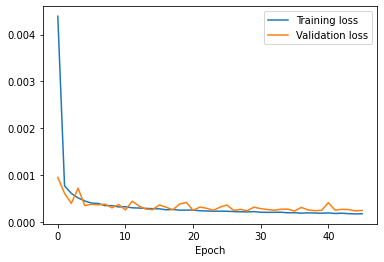

In [38]:
# grafico del processo di training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

In [39]:
# %% stima delle lunghezze delle linee nelle immagini del validation set
# utilizzate il metodo predict dell'oggetto model
validation_labels_hat = model.predict(validation_images)

# conversione delle stime normalizzate in pixel
validation_labels_hat_px = validation_labels_hat * labels_px_range

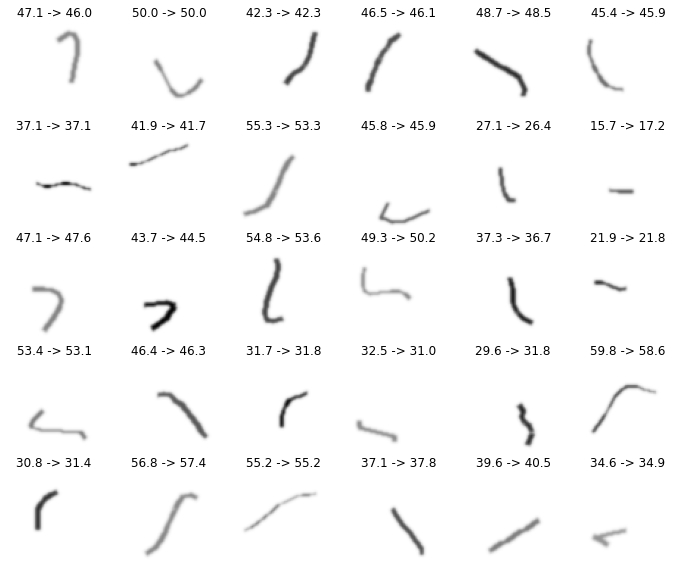

In [40]:
# %% visualizzazione delle stime per alcuni esempi del dataset di validazione
rows = 5
cols = 6

# primo campione da mostrare
start = 1000

plt.figure(figsize=(12,10))
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    img = validation_images[start + i]
    plt.imshow(img, cmap='Greys', vmin=0, vmax=1)
    plt.axis('off')
    plt.title('{:.1f} -> {:.1f}'.format(
        validation_labels_px[start + i],
        validation_labels_hat_px[start + i][0]))
plt.show()

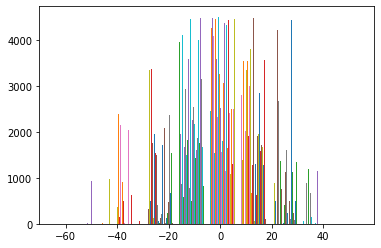

In [43]:
# %% analisi degli errori e calcolo incertezze
# vettori degli errori commessi nella stima delle lunghezze del dataset di
# validazione

e = validation_labels_hat_px - validation_labels_px

plt.hist(e)

media = np.average(e)
# distribuzione dell'errore (utilizzate la funzione plt.hist)

# calcolo e stampa della media degli errori (bias della stima)

# calcolo e stampa della deviazione standard degli errori (incertezza standard
# della stima)

# calcolo e stampa dell'incertezza estesa con una assegnata probabilità di
# copertura

# calcolo e stampa dell'incertezza di caso peggiore

In [44]:
print(media)

-0.08972193352928794
